In [20]:
# Dependencies
import random
from citipy import citipy
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# API key for OpenWeather
key = "c7f9f57b4779391ea1f5ae067591c971"

In [49]:
# Randomly generate lat and long
lat = []
long = []
i = 0
while i < 500:
    lat.append(random.uniform(-90.0000,90.0000))
    long.append(random.uniform(-180.0000,180.0000))
    i += 1

In [50]:
# Using randomly generated lat and long to get city name
city = []
for j in range(0,500):
    city.append(citipy.nearest_city(lat[j],long[j]))
    city[j] = city[j].city_name
    if city[j] in city:
        city[j] = citipy.nearest_city(random.uniform(-90.0000,90.0000),random.uniform(-180.0000,180.0000))
        city[j] = city[j].city_name

In [51]:
# Creating the URL for each target city and getting data from OpenWeather
city_weather = []
print('Beginning Data Retrieval')
print('=' * 20)
for k in range(0,500):
    target_url = ("http://api.openweathermap.org/data/2.5/forecast?q=%s&units=imperial&mode=json&APPID=" + key) % city[k]
    city_weather.append(requests.get(target_url).json())
    print('Processing record: ', k + 1, ' City:', city[k], ' URL:', target_url)

Beginning Data Retrieval
Processing record:  1  City: east london  URL: http://api.openweathermap.org/data/2.5/forecast?q=east london&units=imperial&mode=json&APPID=c7f9f57b4779391ea1f5ae067591c971
Processing record:  2  City: mount isa  URL: http://api.openweathermap.org/data/2.5/forecast?q=mount isa&units=imperial&mode=json&APPID=c7f9f57b4779391ea1f5ae067591c971
Processing record:  3  City: kapaa  URL: http://api.openweathermap.org/data/2.5/forecast?q=kapaa&units=imperial&mode=json&APPID=c7f9f57b4779391ea1f5ae067591c971
Processing record:  4  City: qaanaaq  URL: http://api.openweathermap.org/data/2.5/forecast?q=qaanaaq&units=imperial&mode=json&APPID=c7f9f57b4779391ea1f5ae067591c971
Processing record:  5  City: busselton  URL: http://api.openweathermap.org/data/2.5/forecast?q=busselton&units=imperial&mode=json&APPID=c7f9f57b4779391ea1f5ae067591c971
Processing record:  6  City: qaanaaq  URL: http://api.openweathermap.org/data/2.5/forecast?q=qaanaaq&units=imperial&mode=json&APPID=c7f9f5

In [52]:
# Taking data from OpenWeather and getting desired info.
city_lat = []
city_long = []
city_temp = []
city_humidity = []
city_cloud = []
city_wind = []
country = []
date = []
for l in range(0,500):
    city_lat.append(city_weather[l]['city']['coord']['lat'])
    city_long.append(city_weather[l]['city']['coord']['lon'])
    city_temp.append(city_weather[l]['list'][0]['main']['temp'])
    city_humidity.append(city_weather[l]['list'][0]['main']['humidity'])
    city_cloud.append(city_weather[l]['list'][0]['clouds']['all'])
    city_wind.append(city_weather[l]['list'][0]['wind']['speed'])
    country.append(city_weather[l]['city']['country'])
    date.append(city_weather[l]['list'][0]['dt_txt'])

In [53]:
df = pd.DataFrame({'City': city,
                  'Cloudiness': city_cloud,
                  'Country': country,
                  'Date': date,
                  'Humidity': city_humidity,
                  'Latitude': city_lat,
                  'Longtitude': city_long,
                  'Temperature': city_temp,
                  'Wind Speed': city_wind})
df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longtitude,Temperature,Wind Speed
0,east london,88,ZA,2017-08-18 03:00:00,100,-33.0153,27.9116,61.29,16.46
1,mount isa,0,AU,2017-08-18 03:00:00,23,-20.7334,139.5000,93.07,16.46
2,kapaa,56,US,2017-08-18 03:00:00,78,22.0752,-159.3190,82.60,9.19
3,qaanaaq,0,GL,2017-08-18 03:00:00,100,77.4840,-69.3633,30.42,7.63
4,busselton,100,AU,2017-08-18 03:00:00,99,-33.6501,115.3333,62.29,22.28


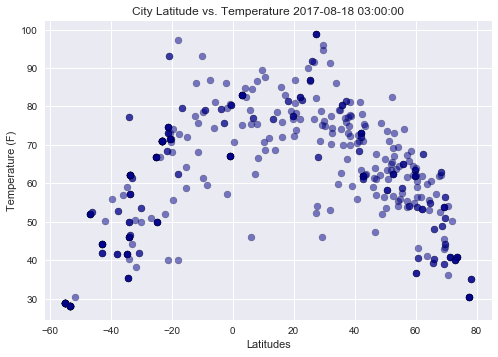

In [54]:
# Latitude vs. Temperature Plot
plt.scatter(df['Latitude'],df['Temperature'],color='darkblue',edgecolor='black',alpha=0.5)
plt.title('City Latitude vs. Temperature ' + str(df['Date'][0]))
plt.xlabel('Latitudes')
plt.ylabel('Temperature (F)')
sns.set()
plt.show()

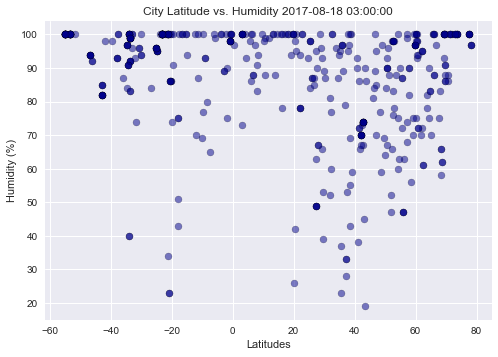

In [55]:
# Latitude vs. Humidity Plot
plt.scatter(df['Latitude'],df['Humidity'],color='darkblue',edgecolor='black',alpha=0.5)
plt.title('City Latitude vs. Humidity ' + str(df['Date'][0]))
plt.xlabel('Latitudes')
plt.ylabel('Humidity (%)')
sns.set()
plt.show()

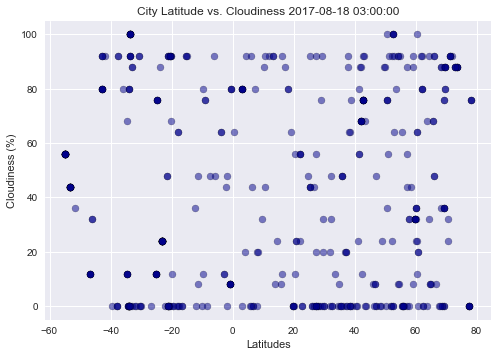

In [56]:
# Latitude vs. Cloudiness Plot
plt.scatter(df['Latitude'],df['Cloudiness'],color='darkblue',edgecolor='black',alpha=0.5)
plt.title('City Latitude vs. Cloudiness ' + str(df['Date'][0]))
plt.xlabel('Latitudes')
plt.ylabel('Cloudiness (%)')
sns.set()
plt.show()

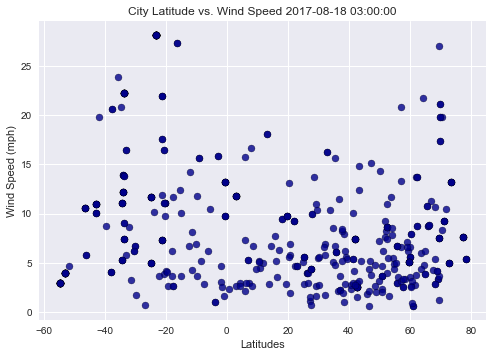

In [57]:
# Latitude vs. Wind Speed Plot
plt.scatter(df['Latitude'],df['Wind Speed'],color='darkblue',edgecolor='black',alpha=0.8)
plt.title('City Latitude vs. Wind Speed ' + str(df['Date'][0]))
plt.xlabel('Latitudes')
plt.ylabel('Wind Speed (mph)')
sns.set()
plt.show()